In [3]:
#madisontest


In [4]:
#import dependencies
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

In [5]:
data = pd.read_csv('../project3/data/songs_normalize.csv')
data.head(10)



,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic


In [6]:
#cleaning/sorting popularity data 
poularity_data = data.groupby('artist')['popularity'].idxmax()
popularity_df = data.loc[poularity_data]

sorted_popularity_df = popularity_df.sort_values(by='popularity', ascending=False)
sorted_popularity_df.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
1709,Ed Sheeran,Perfect,263400,False,2017,85,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,pop
1514,Avicii,The Nights,176658,False,2014,85,0.527,0.835,6,-5.298,1,0.0433,0.01660,0.000000,0.2490,0.654,125.983,"pop, Dance/Electronic"
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,hip hop
1227,Bruno Mars,Locked out of Heaven,233478,False,2012,85,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,pop
1601,Drake,One Dance,173986,False,2016,84,0.792,0.625,1,-5.609,1,0.0536,0.00776,0.001800,0.3290,0.370,103.967,"hip hop, pop, R&B"


In [7]:
#top 10 songs 

top_10_df=sorted_popularity_df.head(10)

fig_top_10_bar_chart = px.bar(top_10_df, x='song', y='popularity',
                              title='Top 10 Songs by Popularity',
                              labels={'popularity': 'Popularity'})

# Show the bar chart
fig_top_10_bar_chart.show()

In [8]:
#Number of Songs per Year
songs_per_years = data['year'].value_counts().sort_index()

iplot(px.bar(songs_per_years, 
       title='Number of songs per year', 
       text_auto=True,
       labels=dict(index='year',value='number of songs'),
       color_discrete_sequence=['#1DB954']
      ).update_xaxes(type='category'))

In [9]:
#Top Artists 

#find how many artists we have in the dataset 
print(f"There are about [{data['artist'].nunique()}] artists.")


#find how many songs per artist in the dataset
artists=data['artist'].value_counts()
artists.head()

There are about [835] artists.


artist
Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
Name: count, dtype: int64

In [10]:
#One Hit Wonder - Visualization 

artists_with_one_song = artists.loc[lambda x:x == 1]

iplot(px.pie(values=[len(artists_with_one_song), len(artists)-len(artists_with_one_song)],
             names=['1 song', '>1 songs'], 
             title="Artists with 1 top hit VS Artists with >1 top hit",
             color_discrete_sequence=['#4287f5', '#f54287']
      ).update_traces(textinfo='label+percent'))

In [11]:
#Top Artists Visualization 

fig = px.histogram(data, x='artist', barmode='group'
             , height=800, width=1200
             , color_discrete_sequence=px.colors.diverging.Spectral).update_xaxes(categoryorder="total descending")

                                                                                                                                                    
fig.update_layout(
    plot_bgcolor='white'
)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black'
    
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black'
    
)

In [12]:
#Top 10 Artists and their Song Popularity 
artist_df = data[['artist', 'popularity']].groupby('artist').mean().sort_values(by='artist')
artists = artists.sort_index()
artist_df['total songs'] = artists.values
artist_df.sort_values(by='total songs',ascending=False, inplace=True)
artist_df.reset_index(inplace=True)

iplot(px.scatter(artist_df[:10], 
           x='artist', 
           y='popularity', 
           size='total songs',
           size_max=40,
           color='popularity',
           title='Top 10 artists vs average popularity of their top hits',
           hover_name='total songs'
          ))

In [13]:
#Genre - data cleaning 
data = data.assign(genre=data['genre'].str.split(",")).explode("genre")
data['genre'] = data['genre'].str.strip()
data.drop_duplicates(inplace=True)

data.genre.value_counts()

genre
pop                  1582
hip hop               751
R&B                   437
Dance/Electronic      380
rock                  225
metal                  64
latin                  63
set()                  22
country                20
Folk/Acoustic          20
World/Traditional      10
easy listening          7
blues                   4
jazz                    2
classical               1
Name: count, dtype: int64

In [14]:
#Genre - Data Cleaning Cont. 
data.loc[data['genre']=='set()','genre'] = ''
data.loc[data['genre']=='set()']

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre


In [15]:
#Song Distribution by Genres
fig=px.histogram(data.groupby('genre',as_index=False)
                 .count()
                 .sort_values(by='song',ascending=False)
                 ,x='genre',y='song'
                 ,title='<b>Songs Distribution by Genres</b>')
fig.update_layout(title_x=0.5)

In [16]:
#Number of Songs by Year 
fig=px.area(data.groupby('year',as_index=False).count()
            .sort_values(by='song',ascending=False).sort_values(by='year'),x='year',y='song',markers=True,labels={'song':'Songs Count'}
            ,color_discrete_sequence=['green'],title='<b>Number of Songs Per Year')

fig.show()

In [17]:
#Song Distribution by Genre

fig=px.histogram(data.groupby('genre',as_index=False)
                 .count()
                 .sort_values(by='song',ascending=False)
                 ,x='genre',y='song'
                 ,color_discrete_sequence=['green']
                 ,template='xgridoff',marginal='box'
                 ,title='<b>Songs Distribution by Genres</b>')
fig.update_layout(title_x=0.5)

In [18]:
#Top 50 Artists by Popularity

top50singers_popularity = data.groupby('artist',as_index=False).sum().sort_values(by='popularity',ascending=False).head(50)

fig = px.bar(top50singers_popularity,x='artist',y='popularity',color_discrete_sequence=['green']
       ,template='xgridoff',text='popularity',title='<b>Top 50 Popular Singers')

fig.update_layout(
    xaxis=dict(tickangle=45),
)

fig.show()

In [19]:
#Explicit Song Trends Over Time 
fig=px.area(data[data['explicit']==True].groupby('year',as_index=False).count().sort_values(by='song',ascending=False).sort_values(by='year'),x='year',y='song',labels={'song':'Song Count'},markers=True,color_discrete_sequence=['magenta']
            ,template='xgridoff'
            ,title='<b>Explicit Songs Trends')
fig.update_layout(hovermode='x')

In [20]:
#Explicit Song Distribution by Year 
year_explicit = data.groupby(['year','explicit']).size().unstack(fill_value=0).reset_index()
year_explicit.rename(columns={False:'Clean', True: 'Explicit'}, inplace=True)

iplot(px.bar(year_explicit, 
       y=['Clean', 'Explicit'], 
       x='year',
       title='Explicit vs Clean distribution each year',
       color_discrete_sequence=['cornflowerblue', 'crimson']
      ).update_xaxes(type='category'))

In [21]:
# Which genre is most explicit?
average_explicitness_by_genre = data.groupby('genre')['explicit'].mean().reset_index()

# Plot the bar graph using Plotly Express
fig = px.bar(average_explicitness_by_genre.sort_values(by='explicit', ascending=False),
             x='genre',
             y='explicit',
             color='explicit',
             color_continuous_scale='magenta',
             labels={'explicit': 'Average Explicitness', 'genre': 'Genre'},
             title='Average Explicitness by Genre',
             height=500)

# Show the plot
fig.show()

In [22]:
# Duration of Songs Over Time
average_duration_by_year = data.groupby('year')['duration_ms'].mean().reset_index()

# Plot the line graph using Plotly Express
fig = px.line(average_duration_by_year,
              x='year',
              y='duration_ms',
              markers=True,
              line_shape='linear',
              labels={'duration_ms': 'Average Duration (ms)', 'year': 'Year'},
              title='Average Duration of Songs Over Time')

# Show the plot
fig.show()

In [23]:
#Variables Distribution - Histograms 
histogram_labels = ['popularity',
                    'danceability', 
                    'energy', 
                    'speechiness', 
                    'loudness', 
                    'acousticness', 
                    'liveness', 
                    'instrumentalness',
                    'valence',
                    'tempo'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(data, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

Regressions

In [24]:
import scipy.stats as st

In [25]:
#Defining Linear Regression 
def linear_reg(x_axis, y_axis,eq_loc):
    global p_r
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    regress_values = x_axis * p_slope + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
    plt.annotate('r-squared = {:.2f}'.format(p_r**2), (0, 1))
   

    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value is: {p_r**2}")

The r-value is: 0.4379236785385611


Text(60000, 1250000, 'r = 0.438')

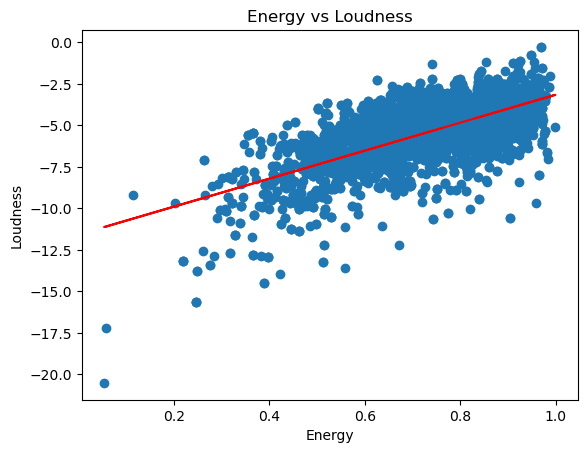

In [26]:
#Energy vs. Loudness 
linear_reg(data['energy'], data['loudness'],(55, 10))

plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Energy vs Loudness')

plt.annotate("r = {:.3f}".format(p_r**2), (60000,1250000), color='red', size=16)

In [27]:
#Energy v Loudness 
fig = px.scatter(data,x='energy',y='loudness',color='tempo'
           ,color_continuous_scale=px.colors.sequential.Turbo
           ,template='xgridoff',title='<b>Energy vs Loudness')



fig.show()

Conclusions
- Pop, hip hop and R&B are top genres
- Rhianna is the top artist by popularity and number of songs in the top charts 
- about 24% of top songs can be considered "one hit wonders"
- Positive linear correlation between energy and loudness 
- Songs are getting shorter in duration over time
- Explicit content in songs fluctuate over time, but there is a steady upwards trend in more recent years